# Inequality (Due to Chance) Simulator

First let's import our libraries. Most of this can be done in Numpy, but we'll use Matplotlib/Seaborn for a couple of visualizations.

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

We'll set up a few of the variables that can be tuned below.

In [15]:
# Tuning
initial_wealth = 50000 # The initial wealth of each individual
num_people = 100 # The number of people in our sample
max_exchange_perc = .05 # No exchange can be more than this amount of individual's overall wealth
num_exchanges = 500000 # The number of exhanges (simulations) to run

The actual simulation happens in the code block below. The general logic is:

1. Create an array of length `num_people` representing our sample, each with an initial wealth value of `initial_wealth`.
2. Simulate `num_exchanges` exchanges of wealth between randoom participant pairs from our sample given the following considerations:
 * We randomly choose a pair at each iteration.
 * The maximum amount of wealth exchanged is no more than `max_exchange_perc` times the wealth of the "poorest" individual. That is, each exchange can only be a fraction of the lowest wealth amount in the pair.
 * The exchange value is randomly chosen (so long as it meets the consideration above).
 * We randomly choose who receives the exchanged amount and who loses the exchanged amount.

In [16]:
# Create our initial array with initial wealths
sim_array = np.full(num_people, initial_wealth, dtype=float)
# Create an array of our indices so we can draw from this randomly
poss_indices = np.arange(0,len(sim_array),1)

# Simulate the exchanges
for i in range(num_exchanges):

    # Randomly choose our pairs
    a, b = np.random.choice(poss_indices, size=2, replace=False)

    # Set the maximum exchange value to a fraction of the lowest wealth present
    ab_vals = max_exchange_perc * np.array([sim_array[a], sim_array[b]])
    max_exchange = np.min(ab_vals)

    # Randomly determines the wealth exchange amount noting the consideration above
    poss_exchanges = np.linspace(0, max_exchange, num=50) # 'num' is arbitrary and only affects the resolution of possible exchange values
    exchange_amount = np.random.choice(poss_exchanges, size=1)

    # Randomly choose who "wins" in the exchange and add/subtract the exchange amount accordingly
    who_loses = np.random.randint(1,2)
    if who_loses == 1:
        sim_array[a] = sim_array[a] - exchange_amount
        sim_array[b] = sim_array[b] + exchange_amount
    else:
        sim_array[a] = sim_array[a] + exchange_amount
        sim_array[b] = sim_array[b] - exchange_amount

# Round our output array for presentation
sim_array = np.round(sim_array, 2)

With the results in, let's do some visualization and metrics on our simulation.

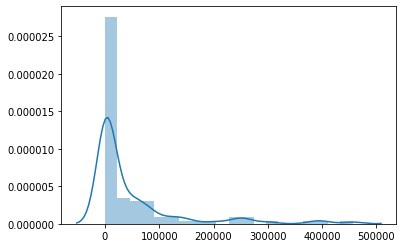

In [17]:
# Plot a histogram of our distribution
sb.distplot(sim_array)
plt.show()

In [18]:
# Print some basic statistical metrics on the distribution
print("The maximum wealth is {}".format(sim_array.max()))
print("The minimum wealth is {}".format(sim_array.min()))
print("The average wealth is {}".format(np.round(sim_array.mean(),2)))
print("The median wealth is {}".format(np.median(sim_array)))

The maximum wealth is 456354.55
The minimum wealth is 0.18
The average wealth is 50000.0
The median wealth is 7123.625


Let's also look at how much wealth different quantiles own in the aggregate.

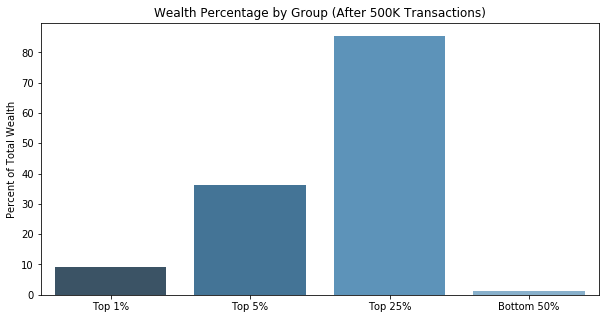

In [24]:
# Creating boolean masks of which array members belong in which quantil
top_1_perc = sim_array >= np.quantile(sim_array,.99)
top_5_perc = sim_array >= np.quantile(sim_array,.95)
top_25_perc = sim_array >= np.quantile(sim_array,.75)
bottom_50_perc = sim_array < np.quantile(sim_array,.50)

# The total wealth from all individuals (to be used for percentages)
total_wealth = sim_array.sum()

# The aggregated wealth of individuals in each quantile (using the masks from above)
top_1_wealth = sim_array[top_1_perc].sum() / total_wealth * 100
top_5_wealth = sim_array[top_5_perc].sum() / total_wealth * 100
top_25_wealth = sim_array[top_25_perc].sum() / total_wealth * 100
bottom_50_wealth = sim_array[bottom_50_perc].sum() / total_wealth * 100

# And finally plot a bar plot of those results
plt.figure(figsize=(10, 5))
sb.barplot(x=["Top 1%", "Top 5%", "Top 25%", "Bottom 50%"],
           y=[top_1_wealth, top_5_wealth, top_25_wealth, bottom_50_wealth], palette="Blues_d")
plt.title('Wealth Percentage by Group (After {}K Transactions)'.format(int(num_exchanges/1000)))
plt.ylabel('Percent of Total Wealth')
plt.show()